#Title & Objective

# Streamlit Machine Learning Application
## (EDA + Classification)

### Objective:
- Upload a CSV dataset
- Perform Exploratory Data Analysis (EDA)
- Train a Classification model
- Deploy using Streamlit (Google Colab)


#Step 1: Install Required Libraries

In [ ]:
!pip install streamlit pandas numpy matplotlib seaborn scikit-learn pyngrok

#Step 2 : Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Step 3 : Load Dataset

In [ ]:
df = pd.read_csv('/content/IEEE-CIS Fraud Detection Models Data.csv')

In [ ]:
df.head()

,TransactionID,isFraud
0,3663549,0.000828
1,3663550,0.001953
2,3663551,0.001503
3,3663552,0.001132
4,3663553,0.001694


#Step 4 : Basic Dataset Info (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143351 entries, 0 to 143350
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  143351 non-null  int64  
 1   isFraud        143351 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.2 MB


In [ ]:
df.describe()

,TransactionID,isFraud
count,1.433510e+05,143351.000000
mean,3.735224e+06,0.031545
std,4.138201e+04,0.134083
min,3.663549e+06,0.000150
25%,3.699386e+06,0.001360
50%,3.735224e+06,0.003066
75%,3.771062e+06,0.008430
max,3.806899e+06,0.998120


In [ ]:
df.isnull().sum()

,0
TransactionID,0
isFraud,0


#Step 5 : EDA-Univariate Analysis

<Figure size 600x400 with 0 Axes>

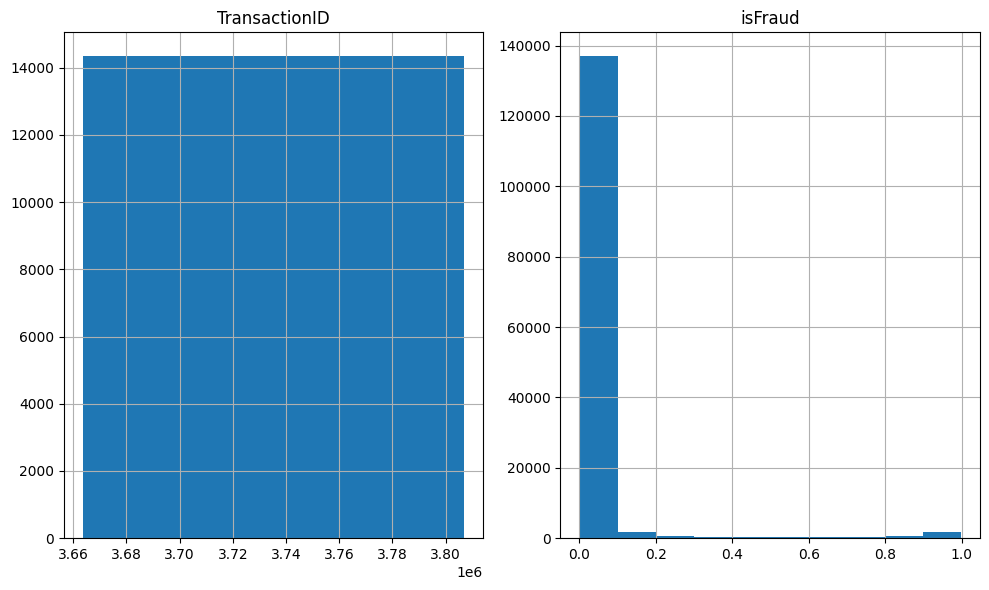

In [ ]:
plt.figure(figsize=(6,4))
df.select_dtypes(include=np.number).hist(figsize=(10,6))
plt.tight_layout()
plt.show()

#Step 6 : EDA-Categorical Analysis

In [ ]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols[:3]:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f"Count Plot - {col}")
    plt.show()

#Step 7 : Correlation Heatmap

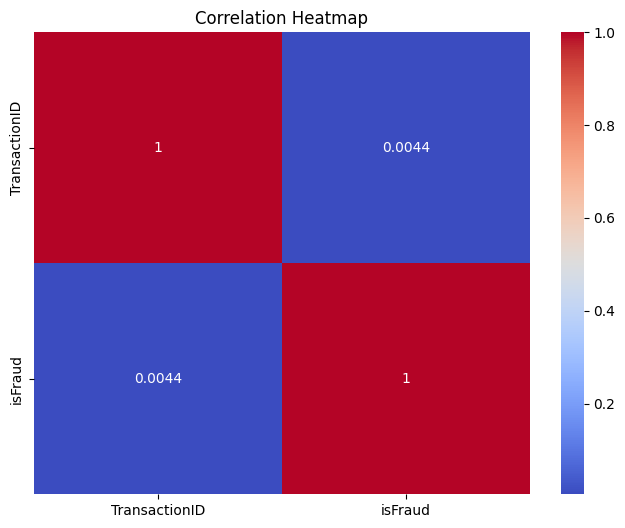

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#Step 8 : Encode Categorical Columns

In [ ]:
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

#Step 9 : Select Target Column

In [ ]:
target_column = df.columns[-1]  # assumes last column is target
X = df.drop(columns=[target_column])
y = df[target_column]

#Step 10 : Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Step 11 : Train Classification Model

In [ ]:
y_train_binary = (y_train >= 0.5).astype(int)
y_test_binary = (y_test >= 0.5).astype(int)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train_binary)

y_pred = model.predict(X_test)

#Step 12 : Model Evaluation

In [ ]:
print("Accuracy:", accuracy_score(y_test_binary, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_binary, y_pred))
print("\nClassification Report:\n", classification_report(y_test_binary, y_pred))

Accuracy: 0.9769104670224268

Confusion Matrix:
 [[28009     0]
 [  662     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     28009
           1       0.00      0.00      0.00       662

    accuracy                           0.98     28671
   macro avg       0.49      0.50      0.49     28671
weighted avg       0.95      0.98      0.97     28671



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


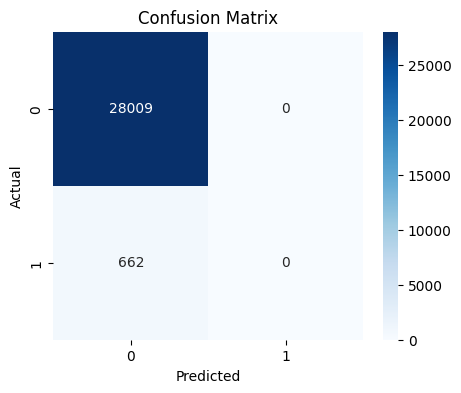

In [ ]:
cm = confusion_matrix(y_test_binary, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()